# Functional Data Cleaning with Pandas

Questions to answer:
- why is data processing wrangling important?
- what's good about pandas? 
- what is this article aiming to achieve?

## Import Libraries

In [349]:
import pandas as pd
import numpy as np
import re
from pathlib import Path
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Load data

In [350]:
path = Path().cwd().parent / 'data' / 'player_info.parquet'
data = pd.read_parquet(path)

In [351]:
# data.sample(frac=0.25, random_state=42).to_csv(
#     Path().cwd().parent / "data" / "player_info.csv", index=False
# )

In [352]:
df = data.copy()

In [353]:
df = df.drop(columns=['tm_id', 'tm_name'])

In [354]:
# data_dict = {
#     'dob': ['Jun 15, 1995', 'Mar 22, 1994', 'Sep 10, 1997', 'Feb 8, 2004', 'Nov 30, 1987', 'Jul 3, 1999', 'Apr 18, 2001', 'Dec 12, 1998', 'May 5, 2001', 'Oct 20, 2003'],
#     'age': [28, 29, 26, 20, 35, 24, 22, 25, 22, 19],
#     'country': ['Brazil', 'Germany', 'United States', 'England', 'England', 'France', 'Spain', 'Argentina', 'Portugal', 'England'],
#     'current_club': ['FC Metropolis', 'FC Metropolis', 'SC Liberty', 'FC Metropolis U21', 'FC Metropolis', 'FC Metropolis', 'FC Metropolis', 'FC Metropolis', 'SC Liberty', 'FC Metropolis U21'],
#     'height': ['1,90m', '1,88m', '1,93m', '-', '1,86m', '1,82m', '1,79m', '1,76m', '1,81m', '1,77m'],
#     'name': ['Rafael Silva', 'Lukas Müller', 'Jason Thompson', 'Oliver Grant', 'Michael Brown', 'Antoine Dupont', 'Carlos Rodriguez', 'Leo Alvarez', 'Andre Silva', 'Jack Wilson'],
#     'position': ['Goalkeeper', 'Goalkeeper', 'Goalkeeper', 'Goalkeeper', 'Goalkeeper', 'Defender', 'Midfielder', 'Forward', 'Forward', 'Forward'],
#     'value': ['€30.00m', '€12.00m', '€5.00m', '€750k', '€300k', '€25.00m', '€18.00m', '€40.00m', '€8.00m', '€2.00m'],
#     'joined_date': ['Aug 1, 2020', 'Jul 15, 2021', 'Jun 30, 2022', 'None', 'Jul 1, 2022', 'Aug 15, 2022', 'Jul 1, 2022', 'Jun 30, 2022', 'Jan 15, 2023', 'None'],
#     'number': [25, 18, 13, '-', 33, 15, 20, 10, 19, '-'],
#     'signed_from': ['SC Brasileiro', 'SV Bundesliga', 'American FC', 'None', 'City United FC', 'Lyon FC', 'Barcelona B', 'River Plate', 'Sporting CP', 'None'],
#     'signing_fee': ['free transfer', '€8.50m', '€4.20m', '0', 'free transfer', '€22.00m', '€15.50m', '€35.00m', '€6.75m', '0'],
#     'foot': ['left', 'right', 'right', '', 'right', 'left', 'right', 'left', 'right', ''],
#     'season': [2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
#     'team': ['fc-metropolis', 'fc-metropolis', 'sc-liberty', 'fc-metropolis', 'fc-metropolis', 'fc-metropolis', 'fc-metropolis', 'fc-metropolis', 'sc-liberty', 'fc-metropolis']
# }

# data = pd.DataFrame(data_dict)


In [355]:
path = Path().cwd().parent / 'data' / 'fake_football_data.csv'
data = pd.read_csv(path)

In [356]:
df = data.copy()

## Check data

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dob           55 non-null     object
 1   age           55 non-null     int64 
 2   country       55 non-null     object
 3   current_club  55 non-null     object
 4   height        55 non-null     object
 5   name          55 non-null     object
 6   position      55 non-null     object
 7   value         55 non-null     object
 8   joined_date   46 non-null     object
 9   number        55 non-null     object
 10  signed_from   46 non-null     object
 11  signing_fee   55 non-null     object
 12  foot          51 non-null     object
 13  season        55 non-null     int64 
dtypes: int64(2), object(12)
memory usage: 6.1+ KB


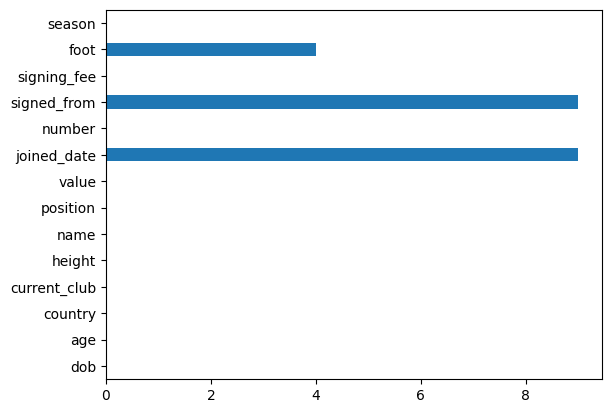

In [358]:
df.isnull().sum().plot(kind='barh')
plt.show()

# Data Processing

## Dealing with Dates

In [359]:
# df[['dob_month', 'dob_day', 'dob_year']] = df['dob'].str.replace(',', '').str.split(' ', expand=True)

In [360]:
# df = df.drop(columns=['dob'])

In [361]:
# def expand_date(df: pd.DataFrame, column: str) -> pd.DataFrame:
#     data = df.copy()
#     columns = [f'{column}_month', f'{column}_day', f'{column}_year']
#     data[columns] = data[column].str.replace(',', '').str.split(' ', expand=True)
#     return data.drop(columns=[column])

In [362]:
def convert_dts(df: pd.DataFrame, column: str) -> pd.DataFrame:
    data = df.copy()
    data.loc[:, column] = pd.to_datetime(data[column], errors='coerce')
    return data

#### Height column

- regex
- converting to numeric

Regex can be used on a pandas column to replace a value.

In [363]:
df.loc[:, "height"] = df["height"].str.replace(
    r"[,m]", "", regex=True
)  # remove commas and meters
df.loc[:, "height"] = (
    pd.to_numeric(df["height"], errors="coerce").round().astype("Int64")
)  # convert to numeric

In [364]:
def process_height(df: pd.DataFrame) -> pd.DataFrame:
    data = df.copy()  # make a copy of the dataframe
    data.loc[:, "height"] = data["height"].str.replace(
        r"[,m]", "", regex=True
    )  # remove commas and meters
    data.loc[:, "height"] = (
        pd.to_numeric(data["height"], errors="coerce").round().astype("Int64")
    )  # convert to numeric
    return data

#### Value Column

- match-case
- apply

In [365]:
df['value'].str.replace(r'[\€m]', '', regex=True)

0      250k
1      300k
2      850k
3      1.80
4      3.80
5      2.70
6      9.50
7      1.80
8      2.20
9      850k
10    27.00
11     9.50
12     120k
13     220k
14     9.50
15    16.00
16    22.00
17     7.50
18     1.20
19    80.00
20    28.00
21    55.00
22     0.00
23     6.50
24     6.50
25     180k
26     2.80
27    20.00
28     300k
29     350k
30    22.00
31     750k
32    15.00
33    32.00
34     280k
35     2.20
36     0.00
37    38.00
38     7.50
39    17.00
40     2.20
41     7.50
42    14.00
43     2.30
44     1.70
45    58.00
46    19.00
47     450k
48     1.80
49     300k
50    22.00
51     8.50
52    14.00
53     4.80
54     8.50
Name: value, dtype: object

Dealing with the value column requires extra care as there are two different ways of recording values - millions and thousands. If we simply remove € and m or k, then the values with k will have a much larger value than the ones with m - which is obviously wrong. We have to scale the k values to millions e.g. 400k -> 0.4

To do this, we can combine match-case syntax to implement some logic and then use the .apply() to apply the match-case as a function to the column.

Match-case is fairly new and requires Python 3.10 and is a good alternative to if-else.

In [366]:
values = df['value'].tolist()

for value in values:
    match value:
        case value if 'k' in value:
            value = float(re.sub(r'[\€k]', '', value)) / 1000
            print(value)
        case value if 'm' in value:
            value = float(re.sub(r'[\€m]', '', value))
            print(value)
        case _:
            value = float(re.sub(r'[\€]', '', value))
            print(value)

0.25
0.3
0.85
1.8
3.8
2.7
9.5
1.8
2.2
0.85
27.0
9.5
0.12
0.22
9.5
16.0
22.0
7.5
1.2
80.0
28.0
55.0
0.0
6.5
6.5
0.18
2.8
20.0
0.3
0.35
22.0
0.75
15.0
32.0
0.28
2.2
0.0
38.0
7.5
17.0
2.2
7.5
14.0
2.3
1.7
58.0
19.0
0.45
1.8
0.3
22.0
8.5
14.0
4.8
8.5


In [367]:
def convert_value(value: str) -> float:
    match value:
        case value if 'k' in value:
            return float(re.sub(r'[\€k]', '', value)) / 1000
        case value if 'm' in value:
            return float(re.sub(r'[\€m]', '', value))
        case _:
            return float(re.sub(r'[\€]', '', value))

In [368]:
df['value'].apply(convert_value)

0      0.25
1      0.30
2      0.85
3      1.80
4      3.80
5      2.70
6      9.50
7      1.80
8      2.20
9      0.85
10    27.00
11     9.50
12     0.12
13     0.22
14     9.50
15    16.00
16    22.00
17     7.50
18     1.20
19    80.00
20    28.00
21    55.00
22     0.00
23     6.50
24     6.50
25     0.18
26     2.80
27    20.00
28     0.30
29     0.35
30    22.00
31     0.75
32    15.00
33    32.00
34     0.28
35     2.20
36     0.00
37    38.00
38     7.50
39    17.00
40     2.20
41     7.50
42    14.00
43     2.30
44     1.70
45    58.00
46    19.00
47     0.45
48     1.80
49     0.30
50    22.00
51     8.50
52    14.00
53     4.80
54     8.50
Name: value, dtype: float64

#### Signing Fee Column

Extending match-case and apply

In [369]:
def convert_value(value: str) -> float:
    match value.lower():
        case value if 'k' in value:
            return float(re.sub(r'[\€k]', '', value)) / 1000
        case value if 'm' in value:
            return float(re.sub(r'[\€m]', '', value))
        case 'free transfer' | '?' | '-':
            return 0.0
        case _:
            return float(re.sub(r'[\€]', '', value))

In [370]:
df['signing_fee'].apply(convert_value)

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
5       0.80
6      10.20
7       3.80
8       4.50
9       0.00
10     25.50
11     13.50
12      0.00
13      0.00
14      3.20
15      0.00
16     19.50
17      6.50
18      4.20
19     40.50
20      0.00
21     38.50
22      0.00
23     12.80
24      4.50
25      0.00
26     24.50
27     16.80
28      0.00
29      5.80
30      5.50
31      0.30
32      8.50
33      3.50
34      0.00
35      0.06
36      0.00
37      0.00
38     14.50
39      0.00
40      0.00
41      0.00
42      0.00
43      5.20
44      1.70
45    115.00
46      2.20
47      0.00
48      0.00
49      0.00
50     21.50
51     17.80
52     12.00
53      1.20
54     54.00
Name: signing_fee, dtype: float64

In [371]:
def clean_value(df: pd.DataFrame, column: str) -> pd.DataFrame:
    data = df.copy()
    data.loc[:, column] = data[column].apply(convert_value)
    return data

#### Number Column
- simple replace

In [372]:
df['number'].replace('-', 'No Number')

0     No Number
1            31
2            52
3            12
4            16
5             4
6            26
7            23
8             8
9             5
10           24
11            4
12    No Number
13           50
14           22
15            6
16           17
17            3
18            1
19           37
20           29
21           10
22    No Number
23            8
24           16
25    No Number
26            9
27           23
28    No Number
29    No Number
30           20
31           46
32           35
33            5
34    No Number
35           27
36    No Number
37           27
38           30
39           13
40           33
41    No Number
42           26
43           19
44           20
45            8
46           27
47           30
48           12
49    No Number
50           16
51           11
52           21
53           24
54           13
Name: number, dtype: object

In [373]:
def clean_number(df: pd.DataFrame) -> pd.DataFrame:
    data = df.copy()
    data.loc[:, 'number'] = data['number'].replace('-', 0)
    # data.loc[:, 'number'] = pd.to_numeric(data['number'], errors='coerce').astype('Int64')
    return data

Position Column

- Use pandas indexing to change a value

In [374]:
df['position'].value_counts()

position
Central Midfield      10
Goalkeeper             8
Centre-Back            7
Right-Back             6
Right Winger           6
Attacking Midfield     5
Defensive Midfield     5
Left Winger            4
Centre-Forward         3
Left-Back              1
Name: count, dtype: int64

In [375]:
# df.loc[df['position'] == 'Midfielder', 'position'] = 'Central Midfield'

In [376]:
def clean_position(df: pd.DataFrame) -> pd.DataFrame:
    data = df.copy()
    data.loc[data['position'] == 'Midfielder', 'position'] = 'Central Midfield'
    return data

Current Club Column 

- simple replace

In [377]:
df['current_club'].value_counts()

current_club
Without ClubWithout Club    6
Villa Park FC               6
Northern Castle FC          5
Coastal FC                  3
Oakview FC                  3
Phoenix FC                  3
Hammers United              2
Redwood FC                  2
Coastal FC U21              2
Phoenix FC U21              1
Merseyside FC U21           1
Wolfpack FC                 1
Riverside FC                1
Gunners FC U21              1
Gunners FC                  1
Forest Green FC             1
Sevilla FC                  1
Metropolis City             1
Brightvale United           1
Bergamo FC                  1
Redwood FC U18              1
Steeltown United            1
IF Nordica                  1
Lakeside Town               1
Lakeside Town U21           1
FC Barcelona                1
Metropolis United           1
Celtic Warriors FC          1
Olympus FC                  1
FC Adriatic                 1
Bluebird FC U21             1
Amsterdam FC                1
Name: count, dtype: int64

In [378]:
df['current_club'].replace('Without ClubWithout Club', 'No Club')

0         Redwood FC U18
1             Oakview FC
2        Bluebird FC U21
3            FC Adriatic
4                No Club
5             Olympus FC
6             Redwood FC
7          Villa Park FC
8             Redwood FC
9                No Club
10            Oakview FC
11    Northern Castle FC
12        Coastal FC U21
13    Celtic Warriors FC
14            Phoenix FC
15     Metropolis United
16        Hammers United
17        Hammers United
18    Northern Castle FC
19    Northern Castle FC
20          FC Barcelona
21         Villa Park FC
22     Lakeside Town U21
23            Coastal FC
24         Lakeside Town
25            IF Nordica
26      Steeltown United
27       Forest Green FC
28               No Club
29               No Club
30            Bergamo FC
31        Phoenix FC U21
32            Coastal FC
33         Villa Park FC
34     Merseyside FC U21
35           Wolfpack FC
36        Coastal FC U21
37         Villa Park FC
38         Villa Park FC
39          Riverside FC


In [379]:
def clean_current_club(df: pd.DataFrame) -> pd.DataFrame:
    data = df.copy()
    data.loc[:, 'current_club'] = data['current_club'].replace('Without ClubWithout Club', 'No Club')
    return data

## Imputation

Foot column - stratified

In [380]:
df['foot'].unique()

array([nan, 'right', 'both', 'left'], dtype=object)

In [381]:
df['foot'].value_counts(normalize=True)

foot
right    0.745098
left     0.235294
both     0.019608
Name: proportion, dtype: float64

In [382]:
valid_vals = df['foot'][~df['foot'].isin(['\xa0', '']) & ~df['foot'].isna()]

# Create a mask for empty strings, '\xa0', and NaN values
mask = df['foot'].isin(['\xa0', '']) | df['foot'].isna()

dist = valid_vals.value_counts(normalize=True)
impute_val = np.random.choice(dist.index, p=dist.values)

impute_val = np.random.choice(dist.index, p=dist.values, size=mask.sum())
df.loc[mask, 'foot'] = impute_val

In [383]:
def impute_foot(df: pd.DataFrame) -> pd.DataFrame:
    data = df.copy()
    valid_vals = df['foot'][~df['foot'].isin(['\xa0', '']) & ~df['foot'].isna()]

    # Create a mask for empty strings, '\xa0', and NaN values
    mask = df['foot'].isin(['\xa0', '']) | df['foot'].isna()

    dist = valid_vals.value_counts(normalize=True)
    impute_val = np.random.choice(dist.index, p=dist.values, size=mask.sum())

    data.loc[mask, 'foot'] = impute_val
    return data

#### Height column - groupby

In [384]:
df['height'].isna().sum()

np.int64(3)

There are 81 players without a height. As heights vary based on position we can groupby position and get the median height which will likely be a more accurate imputation of height that taking the median value for all players

In [385]:
median_heights = df.groupby('position')['height'].transform('median')
df['height'] = df['height'].fillna(median_heights)

In [386]:
def impute_height(df: pd.DataFrame) -> pd.DataFrame:
    data = df.copy()
    median_heights = data.groupby('position')['height'].transform('median')
    data.loc[:, 'height'] = data['height'].fillna(median_heights).round().astype('Int64')
    return data

#### All other imputations - impute with Unknown

In [387]:
def impute_with_unknown(df: pd.DataFrame, column: str) -> pd.DataFrame:
    data = df.copy()
    data.loc[:, column] = data[column].fillna('unknown')
    return data

In [388]:
def replace_with_unknown(df: pd.DataFrame, column: str, value: str) -> pd.DataFrame:
    data = df.copy()
    data.loc[:, column] = data[column].replace(value, 'unknown')
    return data

## Rename Columns

In [389]:
# rename = {
#     'value': 'value_euro_m',
#     'signing_fee': 'signing_fee_euro_m',
# }
# df.rename(columns=rename)

In [390]:
def rename_columns(df: pd.DataFrame) -> pd.DataFrame:
    rename = {
        'value': 'value_euro_m',
        'signing_fee': 'signing_fee_euro_m',
    }
    return df.rename(columns=rename)

## Handle data types

In [391]:
from pandas.api.types import is_numeric_dtype

def handle_dtypes(df: pd.DataFrame) -> pd.DataFrame:
    dtypes = {
        "value_euro_m": "float64",
        "signing_fee_euro_m": "float64",
        "age": "Int16",
        "height": "Int16",
        "number": "Int16",  # Using Int64 to handle potential NaN values
        "country": "category",
        "foot": "category",
        "position": "category",
        'signed_from': 'category',
        'joined_date': 'datetime64[ns]',
        'dob': 'datetime64[ns]',
        'name': 'object',
        'current_club': 'category',
        # "tm_id": "Int64",  # Using Int64 to handle potential NaN values
        # "tm_name": "object",
        # "team": "category",
        "season": "Int16",
    }

    for col, dtype in dtypes.items():
        if col in df.columns:
            match dtype:
                case "category":
                    df[col] = df[col].astype(dtype)
                case "float64" | "Int64" | "Int16":
                    if not is_numeric_dtype(df[col]):
                        df[col] = pd.to_numeric(df[col], errors="coerce").round().astype(dtype)
                case "datetime64[ns]":
                    df[col] = pd.to_datetime(df[col], errors="coerce")
                case _:
                    df[col] = df[col].astype(dtype)
        else:
            print(f"Warning: Column '{col}' not found in DataFrame")

    return df

## Pandas Pipeline

In [392]:
dff = (
    data.pipe(process_height)
    .pipe(clean_value, column="value")
    .pipe(clean_value, column="signing_fee")
    .pipe(clean_number)
    .pipe(clean_current_club)
    .pipe(clean_position)
    .pipe(replace_with_unknown, column="foot", value='\xa0')
    .pipe(impute_foot)
    .pipe(impute_height)
    .pipe(impute_with_unknown, column="current_club")
    .pipe(impute_with_unknown, column='signed_from')
    .pipe(rename_columns)
    .pipe(handle_dtypes)
)

In [393]:
dff.to_parquet(Path().cwd().parent / 'data' / 'player_info_cleaned.parquet')

In [394]:
dff

,dob,age,country,current_club,height,name,position,value_euro_m,joined_date,number,signed_from,signing_fee_euro_m,foot,season
0,2006-03-15,18,England,Redwood FC U18,182,Oliver Smith,Central Midfield,0.0,NaT,0,unknown,0.0,left,2023
1,2002-09-22,21,Scotland,Oakview FC,172,Liam Johnson,Central Midfield,0.0,2023-08-01,31,Oakview FC B,0.0,right,2023
2,2004-11-10,19,Wales,Bluebird FC U21,177,Rhys Davies,Attacking Midfield,1.0,NaT,52,unknown,0.0,right,2023
3,1988-06-12,35,Croatia,FC Adriatic,188,Marko Kovač,Left Winger,2.0,2022-07-15,12,Inter Zagreb,0.0,both,2023
4,1997-12-18,26,Colombia,No Club,182,Carlos Mendoza,Central Midfield,4.0,2019-08-01,16,Brightvale United U23,0.0,right,2023
5,1992-05-19,31,Greece,Olympus FC,176,Nikos Papadopoulos,Right-Back,3.0,2017-07-15,4,Sparta FC,1.0,right,2023
6,1995-10-23,28,Serbia,Redwood FC,184,Milan Petrović,Central Midfield,10.0,2023-02-15,26,Torino United,10.0,right,2023
7,1989-03-18,35,Sweden,Villa Park FC,194,Erik Andersson,Goalkeeper,2.0,2022-07-15,23,Roma FC,4.0,right,2023
8,1990-04-30,33,Scotland,Redwood FC,183,Angus MacKenzie,Central Midfield,2.0,2015-08-01,8,Rovers United,4.0,left,2023
9,1993-08-23,30,England,No Club,185,James Thompson,Centre-Back,1.0,2015-07-15,5,West City United,0.0,left,2023


In [395]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   dob                 55 non-null     datetime64[ns]
 1   age                 55 non-null     int64         
 2   country             55 non-null     category      
 3   current_club        55 non-null     category      
 4   height              55 non-null     Int16         
 5   name                55 non-null     object        
 6   position            55 non-null     category      
 7   value_euro_m        55 non-null     float64       
 8   joined_date         46 non-null     datetime64[ns]
 9   number              55 non-null     Int16         
 10  signed_from         55 non-null     category      
 11  signing_fee_euro_m  55 non-null     float64       
 12  foot                55 non-null     category      
 13  season              55 non-null     int64         
d

In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dob           55 non-null     object
 1   age           55 non-null     int64 
 2   country       55 non-null     object
 3   current_club  55 non-null     object
 4   height        55 non-null     object
 5   name          55 non-null     object
 6   position      55 non-null     object
 7   value         55 non-null     object
 8   joined_date   46 non-null     object
 9   number        55 non-null     object
 10  signed_from   46 non-null     object
 11  signing_fee   55 non-null     object
 12  foot          51 non-null     object
 13  season        55 non-null     int64 
dtypes: int64(2), object(12)
memory usage: 6.1+ KB
